In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
car_data=pd.read_csv("cardata.csv")
car_data.tail(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
291,brio,2015,5.40,6.10,31427,Petrol,Dealer,Manual,0
292,jazz,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
293,city,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
294,amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.90,5464,Petrol,Dealer,Manual,0


In [5]:
car_data.shape

(301, 9)

In [7]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<Axes: xlabel='Year', ylabel='Count'>

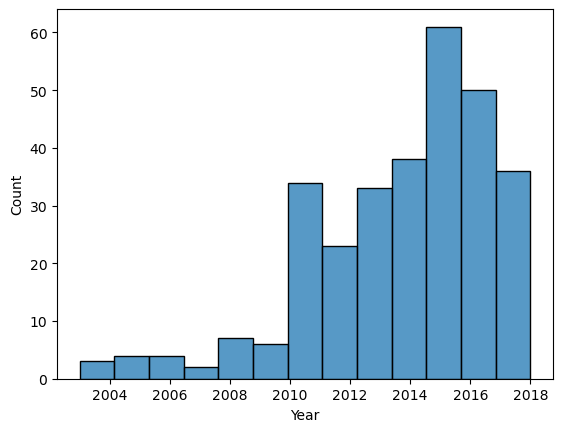

In [13]:
sns.histplot(x='Year',data=car_data)

In [14]:
car_data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [15]:
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_2936\2458407715.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)


In [19]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0


In [21]:
car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,1,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,0,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,0,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,1,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,0,Dealer,Manual,0


In [23]:
car_data['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [25]:
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_2936\3512496852.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace = True)


In [27]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,Manual,0
1,sx4,2013,4.75,9.54,43000,1,0,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,0,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,0,Manual,0
4,swift,2014,4.60,6.87,42450,1,0,Manual,0


In [29]:
car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,1,0,Manual,0
297,brio,2015,4.00,5.9,60000,0,0,Manual,0
298,city,2009,3.35,11.0,87934,0,0,Manual,0
299,city,2017,11.50,12.5,9000,1,0,Manual,0
300,brio,2016,5.30,5.9,5464,0,0,Manual,0


In [31]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,Manual,0
1,sx4,2013,4.75,9.54,43000,1,0,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,0,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,0,Manual,0
4,swift,2014,4.60,6.87,42450,1,0,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,Manual,0
297,brio,2015,4.00,5.90,60000,0,0,Manual,0
298,city,2009,3.35,11.00,87934,0,0,Manual,0
299,city,2017,11.50,12.50,9000,1,0,Manual,0


In [33]:
car_data['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [35]:
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_2936\422960560.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace = True)


In [37]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [39]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [41]:
car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,1,0,0,0
297,brio,2015,4.00,5.9,60000,0,0,0,0
298,city,2009,3.35,11.0,87934,0,0,0,0
299,city,2017,11.50,12.5,9000,1,0,0,0
300,brio,2016,5.30,5.9,5464,0,0,0,0


In [43]:
car_data['Car_Name'].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

In [45]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [47]:
car_data = car_data.drop(car_data.index[101:201])

In [49]:
print(car_data['Car_Name'].to_string(index=False))

                     ritz
                      sx4
                     ciaz
                  wagon r
                    swift
            vitara brezza
                     ciaz
                  s cross
                     ciaz
                     ciaz
                 alto 800
                     ciaz
                     ciaz
                   ertiga
                    dzire
                   ertiga
                   ertiga
                   ertiga
                  wagon r
                      sx4
                 alto k10
                    ignis
                      sx4
                 alto k10
                  wagon r
                    swift
                    swift
                    swift
                 alto k10
                     ciaz
                     ritz
                     ritz
                    swift
                   ertiga
                    dzire
                      sx4
                    dzire
                      800
            

In [51]:
car_data['Car_Name'].value_counts()
car_data


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [55]:
# car_data.drop(car_data[car_data['Car_Name'].str.lower() == 'ritz'].index, inplace = True)

In [57]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [59]:
car_data['Car_Name'].value_counts()

Car_Name
city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
sx4                           6
ertiga                        6
eon                           6
alto k10                      5
i10                           5
swift                         5
etios liva                    4
ritz                          4
dzire                         4
wagon r                       4
etios cross                   3
creta                         3
xcent                         3
etios g                       3
elantra                       2
Royal Enfield Thunder 500     1
baleno                        1
800                           1
omni                          1
land cruiser                  1

In [61]:
car_data.replace({'Car_Name':{
    'city' :                      0,
'corolla altis':                1,
'verna':                        2,
'fortuner':                     3,
'brio'     :                    4,
'ciaz'      :                    5,
'innova'     :                   6,
'i20'         :                  7,
'grand i10'    :                 8,
'jazz'          :                9,
'amaze'          :               10,
'sx4'             :              11,
'ertiga'           :             12,
'eon'               :            13,
'alto k10'           :           14,
'i10'                 :          15,
'swift'                :         16,
'etios liva'            :        17,
'ritz'                   :       18,
'dzire'                   :      19,
'wagon r'        :               20,
'etios cross'    :              21,
'creta'          :               22,
'xcent'          :               23,
'etios g'         :              24,
'elantra'          :             25,
'baleno'                       : 27,
'alto 800'                       :28,
'omni'      :                    29,
'land cruiser' :                 30,
'camry'         :                31,
'etios gd'       :               32,
's cross'         :              33,
'vitara brezza'    :             34,
'corolla'           :            35,
'ignis'  : 36,
'Royal Enfield Thunder 500' : 37,
    
    
}},inplace = True)

In [63]:
car_data.shape

(201, 9)

In [66]:
correlation = car_data.corr()
correlation

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,1.000000,-0.256844,-0.117866,-0.094577,0.215961,-0.045906,0.421987,-0.043077,0.021565
Year,-0.256844,1.000000,0.342869,-0.063660,-0.708402,0.076275,-0.219584,0.001620,-0.152464
Selling_Price,-0.117866,0.342869,1.000000,0.826302,-0.101943,0.402814,-0.060633,0.447809,-0.083896
Present_Price,-0.094577,-0.063660,0.826302,1.000000,0.253592,0.316893,0.031703,0.418035,0.046951
Kms_Driven,0.215961,-0.708402,-0.101943,0.253592,1.000000,0.207128,0.283598,0.134618,0.197648
Fuel_Type,-0.045906,0.076275,0.402814,0.316893,0.207128,1.000000,-0.054684,0.060261,-0.049858
Seller_Type,0.421987,-0.219584,-0.060633,0.031703,0.283598,-0.054684,1.000000,0.086987,0.323900
Transmission,-0.043077,0.001620,0.447809,0.418035,0.134618,0.060261,0.086987,1.000000,0.105008
Owner,0.021565,-0.152464,-0.083896,0.046951,0.197648,-0.049858,0.323900,0.105008,1.000000


<Axes: >

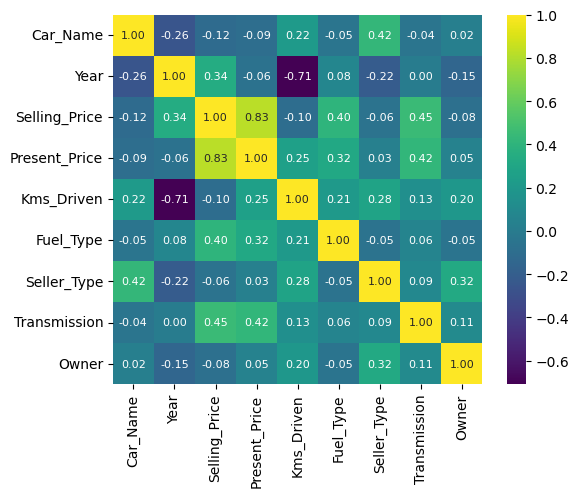

In [68]:
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True, annot_kws={'size':8},cmap='viridis')

In [69]:
x = car_data.drop('Selling_Price',axis=1)
x

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,18,2014,5.59,27000,0,0,0,0
1,11,2013,9.54,43000,1,0,0,0
2,5,2017,9.85,6900,0,0,0,0
3,20,2011,4.15,5200,0,0,0,0
4,16,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...
296,0,2016,11.60,33988,1,0,0,0
297,4,2015,5.90,60000,0,0,0,0
298,0,2009,11.00,87934,0,0,0,0
299,0,2017,12.50,9000,1,0,0,0


In [72]:
y = car_data['Selling_Price']
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 201, dtype: float64

In [74]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [78]:
x.shape,x_train.shape,x_test.shape,y_train.shape,y_test.shape,y.shape

((201, 8), (160, 8), (41, 8), (160,), (41,), (201,))

In [80]:
x_train

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
237,22,2015,13.60,68000,1,0,0,0
271,0,2009,10.00,69562,0,0,0,0
42,11,2008,7.15,58000,0,0,0,0
219,2,2012,9.40,36000,0,0,0,0
240,2,2012,9.40,32322,1,0,0,0
...,...,...,...,...,...,...,...,...
43,19,2014,8.06,45780,1,0,0,0
22,11,2011,8.01,50000,0,0,1,0
72,1,2013,18.61,56001,0,0,0,0
15,12,2016,10.79,43000,1,0,0,0


In [82]:
model = LinearRegression()

In [84]:
model.fit(x_train,y_train)

LinearRegression()

In [86]:
training_data_predict = model.predict(x_train)
training_data_accuracy = metrics.r2_score(training_data_predict,y_train)
print('accuracy of training data:',training_data_accuracy)

accuracy of training data: 0.879245640351206


In [88]:
training_data_predict

array([ 8.75921635,  2.39331258,  1.07550353,  4.4759729 ,  6.28629795,
        4.8386454 ,  4.98978956,  2.95096484,  5.747058  ,  1.03357489,
        2.91062805,  6.79325477, 15.47182528, 10.40673328,  8.3727281 ,
        4.66615838,  7.68172085,  7.76650162,  2.39567294,  1.97380236,
        6.61256425,  8.32892601,  2.0867409 ,  8.00904484,  5.91683854,
        4.3352965 ,  4.45675611,  3.05614318,  7.21473475,  6.47318802,
        9.94181497,  6.32689783,  3.02491782,  0.42019742,  7.42732965,
        9.66098487,  6.61738972,  4.47333656,  3.66251802,  6.45629723,
        5.73400475,  8.85367548,  8.44155498,  4.76641323,  6.38130457,
        6.16100417, 19.0317016 ,  4.15704107,  4.89678532,  8.00377216,
        5.19722311,  7.0213498 ,  4.4304996 ,  4.46307226,  7.59977952,
        6.4246381 ,  1.07311637,  4.43387114,  2.27781041,  8.60579868,
       20.00714714,  8.40769325,  4.61036185,  4.67716494,  2.74258345,
        6.24645296, 18.20449719,  4.7544016 ,  6.44200601,  6.08

In [90]:
testing_data_predict = model.predict(x_test)
testing_data_accuracy = metrics.r2_score(testing_data_predict,y_test)
print('accuracy of testing data:',testing_data_accuracy)

accuracy of testing data: 0.6701302995447866


In [92]:
testing_data_predict

array([13.38104462,  8.13319976,  5.53086006,  8.68645652,  2.72376673,
        4.36726266,  7.8399012 ,  5.4743265 ,  7.12471093,  7.08355875,
        5.70737501,  5.97491118, 22.48727575,  4.67227777,  5.84184888,
        1.42618961,  8.24408856,  4.49085927,  5.55661196,  4.62894273,
       -1.28644346,  7.86279112, 15.02013929,  2.68530189,  2.62575845,
        8.12864998,  4.8443322 ,  6.40872071,  1.13342355,  6.4323514 ,
        7.43102052,  6.68539717,  8.67025496,  8.72117065, 17.5949315 ,
        6.86501805,  7.27911401,  5.31532232,  5.5342873 ,  9.84896205,
        5.19832984])

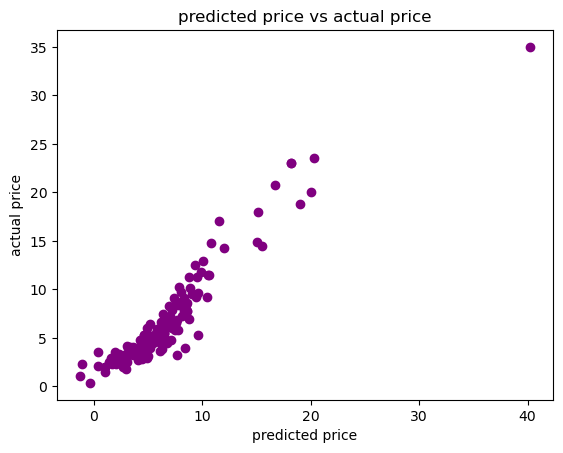

In [94]:
plt.scatter(training_data_predict,y_train,color = 'purple')
plt.xlabel('predicted price')  
plt.ylabel('actual price')
plt.title('predicted price vs actual price')
plt.show()

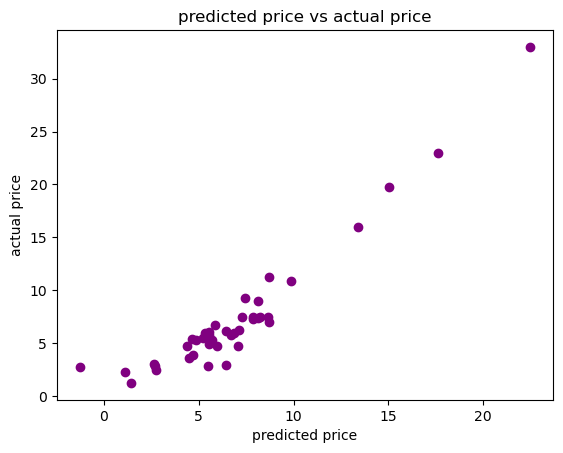

In [95]:

plt.scatter(testing_data_predict,y_test,color = 'purple')
plt.xlabel('predicted price')
plt.ylabel('actual price')
plt.title('predicted price vs actual price')
plt.show()

In [97]:
from sklearn.linear_model import Lasso

In [100]:
lasso = Lasso()

In [102]:
lasso.fit(x_train,y_train)

Lasso()

In [104]:
training1_data_predict = lasso.predict(x_train)
training1_data_accuracy = metrics.r2_score(training1_data_predict,y_train)
print('accuracy of training data:',training1_data_accuracy)

accuracy of training data: 0.8021398407628806


In [106]:
testing1_data_predict = lasso.predict(x_test)
testing1_data_accuracy = metrics.r2_score(testing1_data_predict,y_test)
print('accuracy of testing data:',testing1_data_accuracy)

accuracy of testing data: 0.4450891381921679


In [108]:
testing1_data_predict

array([12.59137687,  7.09934742,  6.03364112,  9.76609743,  3.08108751,
        4.83803798,  6.66067878,  5.65873039,  7.93242224,  8.47509857,
        6.15742474,  4.73946206, 20.72217439,  3.49578298,  6.41914292,
        1.90570076,  7.39084437,  5.0434727 ,  4.61739694,  5.07339083,
        1.50713828,  8.33623065, 14.44776537,  3.58059032,  3.49436207,
        8.79459918,  5.50011834,  3.82462727,  2.02132607,  5.45298524,
        7.85887083,  6.96814815,  8.00794853,  9.31124706, 15.37301307,
        7.39766935,  6.05842267,  3.98048054,  6.03769901,  8.9597364 ,
        5.74467839])

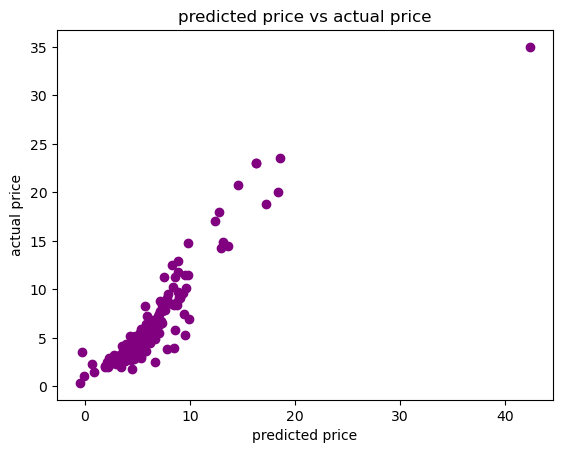

In [110]:
plt.scatter(training1_data_predict,y_train,color = 'purple')
plt.xlabel('predicted price')
plt.ylabel('actual price')
plt.title('predicted price vs actual price')
plt.show()

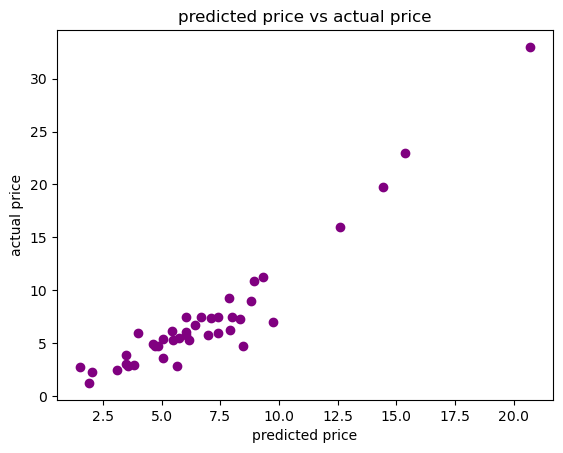

In [111]:
plt.scatter(testing1_data_predict,y_test,color = 'purple')
plt.xlabel('predicted price')
plt.ylabel('actual price')
plt.title('predicted price vs actual price')
plt.show()

In [114]:
from sklearn.linear_model import Ridge
ridge= Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [116]:
training2_data_predict = ridge.predict(x_train)
training2_data_accuracy = metrics.r2_score(training2_data_predict,y_train)
print('accuracy of training data:',training2_data_accuracy)

accuracy of training data: 0.8785761294836797


In [118]:
testing2_data_predict = ridge.predict(x_test)
testing2_data_accuracy = metrics.r2_score(testing2_data_predict,y_test)
print('accuracy of training data:',testing2_data_accuracy)

accuracy of training data: 0.669627968340879


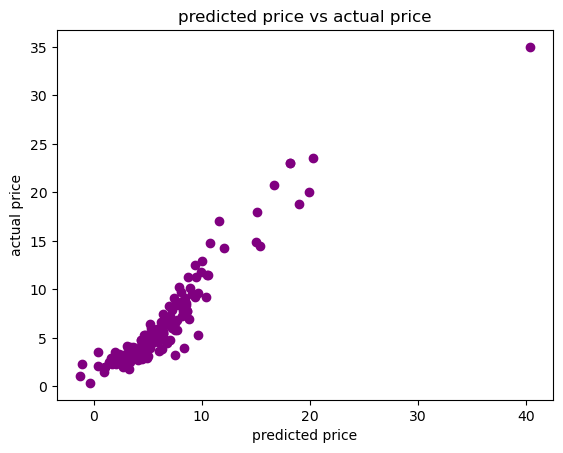

In [120]:
plt.scatter(training2_data_predict,y_train,color='purple')
plt.xlabel('predicted price')
plt.ylabel('actual price')
plt.title('predicted price vs actual price')
plt.show()

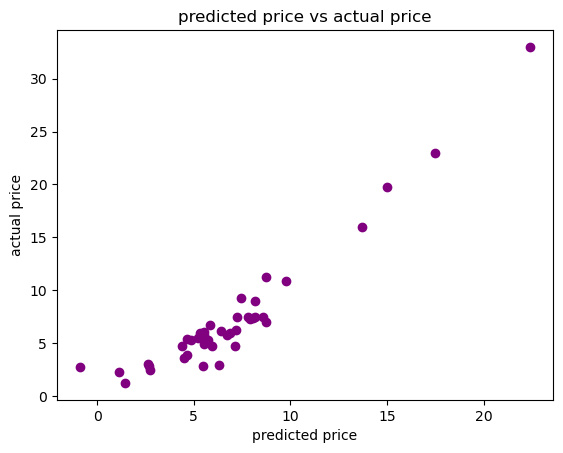

In [121]:
plt.scatter(testing2_data_predict,y_test,color='purple')
plt.xlabel('predicted price')
plt.ylabel('actual price')
plt.title('predicted price vs actual price')
plt.show()

In [123]:
input_data = (18,	2014,	5.59,	27000,	0,	0,	0,	0)
input_data_as_np = np.asarray(input_data)
input_data_reshaped = input_data_as_np.reshape(1, -1)
prediction = lasso.predict(input_data_reshaped)
print('predicted price of car',prediction)

predicted price of car [4.66827027]


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [126]:
prediction

array([4.66827027])

In [128]:
input_data = (4,	2016,	5.90,	5464,	0,	0,	0,	0)
input_data_as_np = np.asarray(input_data)
input_data_reshaped = input_data_as_np.reshape(1, -1)
prediction = lasso.predict(input_data_reshaped)
print('predicted price of car',prediction[0])

predicted price of car 6.15742474362321


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [130]:
prediction

array([6.15742474])

In [195]:
car_data.head(50)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,18,2014,3.35,5.59,27000,0,0,0,0
1,11,2013,4.75,9.54,43000,1,0,0,0
2,5,2017,7.25,9.85,6900,0,0,0,0
3,20,2011,2.85,4.15,5200,0,0,0,0
4,16,2014,4.60,6.87,42450,1,0,0,0
5,34,2018,9.25,9.83,2071,1,0,0,0
6,5,2015,6.75,8.12,18796,0,0,0,0
7,33,2015,6.50,8.61,33429,1,0,0,0
8,5,2016,8.75,8.89,20273,1,0,0,0
9,5,2015,7.45,8.92,42367,1,0,0,0


In [188]:
car_data_og=pd.read_csv("cardata.csv")
car_data_og

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [190]:
#car_data_og = car_data_og.drop(car_data.index[101:201])
car_data_og.drop(range(100, 201), axis=0, inplace=True)

In [192]:
car_data_og.head(60)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [194]:
car_data_og

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [196]:
car_data_og.shape

(200, 9)

In [198]:
print(car_data_og['Car_Name'].to_string(index=False))

         ritz
          sx4
         ciaz
      wagon r
        swift
vitara brezza
         ciaz
      s cross
         ciaz
         ciaz
     alto 800
         ciaz
         ciaz
       ertiga
        dzire
       ertiga
       ertiga
       ertiga
      wagon r
          sx4
     alto k10
        ignis
          sx4
     alto k10
      wagon r
        swift
        swift
        swift
     alto k10
         ciaz
         ritz
         ritz
        swift
       ertiga
        dzire
          sx4
        dzire
          800
     alto k10
          sx4
       baleno
     alto k10
          sx4
        dzire
         omni
         ciaz
         ritz
      wagon r
       ertiga
         ciaz
     fortuner
     fortuner
       innova
     fortuner
       innova
corolla altis
  etios cross
corolla altis
      etios g
     fortuner
corolla altis
  etios cross
     fortuner
     fortuner
     fortuner
   etios liva
       innova
     fortuner
corolla altis
corolla altis
   etios liva
coroll

In [200]:
car_data_og

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [202]:
!pip install gradio


In [203]:
import pandas as pd
import gradio as gr

In [206]:
# Define chatbot function
def answer_question(message, history):
    try:
        msg = message.lower()

        if car_data_og.empty:
            return "Dataset is not loaded."

        if "highest selling price" in msg:
            top = car_data_og.loc[car_data_og['Selling_Price'].idxmax()]
            return f"The highest selling price car is {top['Car_Name']} at ₹{top['Selling_Price']} lakhs."

        elif "lowest selling price" in msg:
            top = car_data_og.loc[car_data_og['Selling_Price'].idxmin()]
            return f"The lowest selling price car is {top['Car_Name']} at ₹{top['Selling_Price']} lakhs."

        elif "produced after" in msg or "made after" in msg or "manufactured after" in msg:
            import re
            year_match = re.search(r'after\s+(\d{4})', msg)
            if year_match:
                year = int(year_match.group(1))
                filtered = car_data_og[car_data_og['Year'] > year]
                if filtered.empty:
                    return f"No cars found that were produced after {year}."
                result = "\n".join([f"{row['Car_Name']} - ₹{row['Selling_Price']} lakhs" for _, row in filtered.iterrows()])
                return f"Cars produced after {year}:\n{result}"
            else:
                return "Please specify a valid year, like 'after 2014'."

        elif "petrol" in msg and "automatic" in msg and ("lowest km" in msg or "lowest kms" in msg):
            filtered = car_data_og[
                (car_data_og['Fuel_Type'].str.lower() == 'petrol') &
                (car_data_og['Transmission'].str.lower() == 'automatic')
            ]
            if filtered.empty:
                return "No car found with petrol and automatic."
            best = filtered.loc[filtered['Kms_Driven'].idxmin()]
            return f"The car is {best['Car_Name']} with {best['Kms_Driven']} kms driven."

        else:
            return "Sorry, I couldn't understand your question. Try asking about selling price, fuel type, or year."

    except Exception as e:
        return f"Error occurred: {str(e)}"


In [208]:
# Launch the chatbot interface using updated Gradio format
chatbot = gr.ChatInterface(fn=answer_question, title="Car ChatBot", chatbot=gr.Chatbot(type="messages"))
chatbot.launch()

C:\Users\hp\anaconda3\Lib\site-packages\gradio\chat_interface.py:321: UserWarning: The gr.ChatInterface was not provided with a type, so the type of the gr.Chatbot, 'messages', will be used.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
